# Verifica di microrobotica 29/04/2025
# BARUFFOLO NOEMI

## NON SONO AMMESSI COSTRUTTI PYTHON DIVERSI DA QUELLI VISTI DURANTE LE LEZIONI !

## 1 - Astrofisica delle stelle
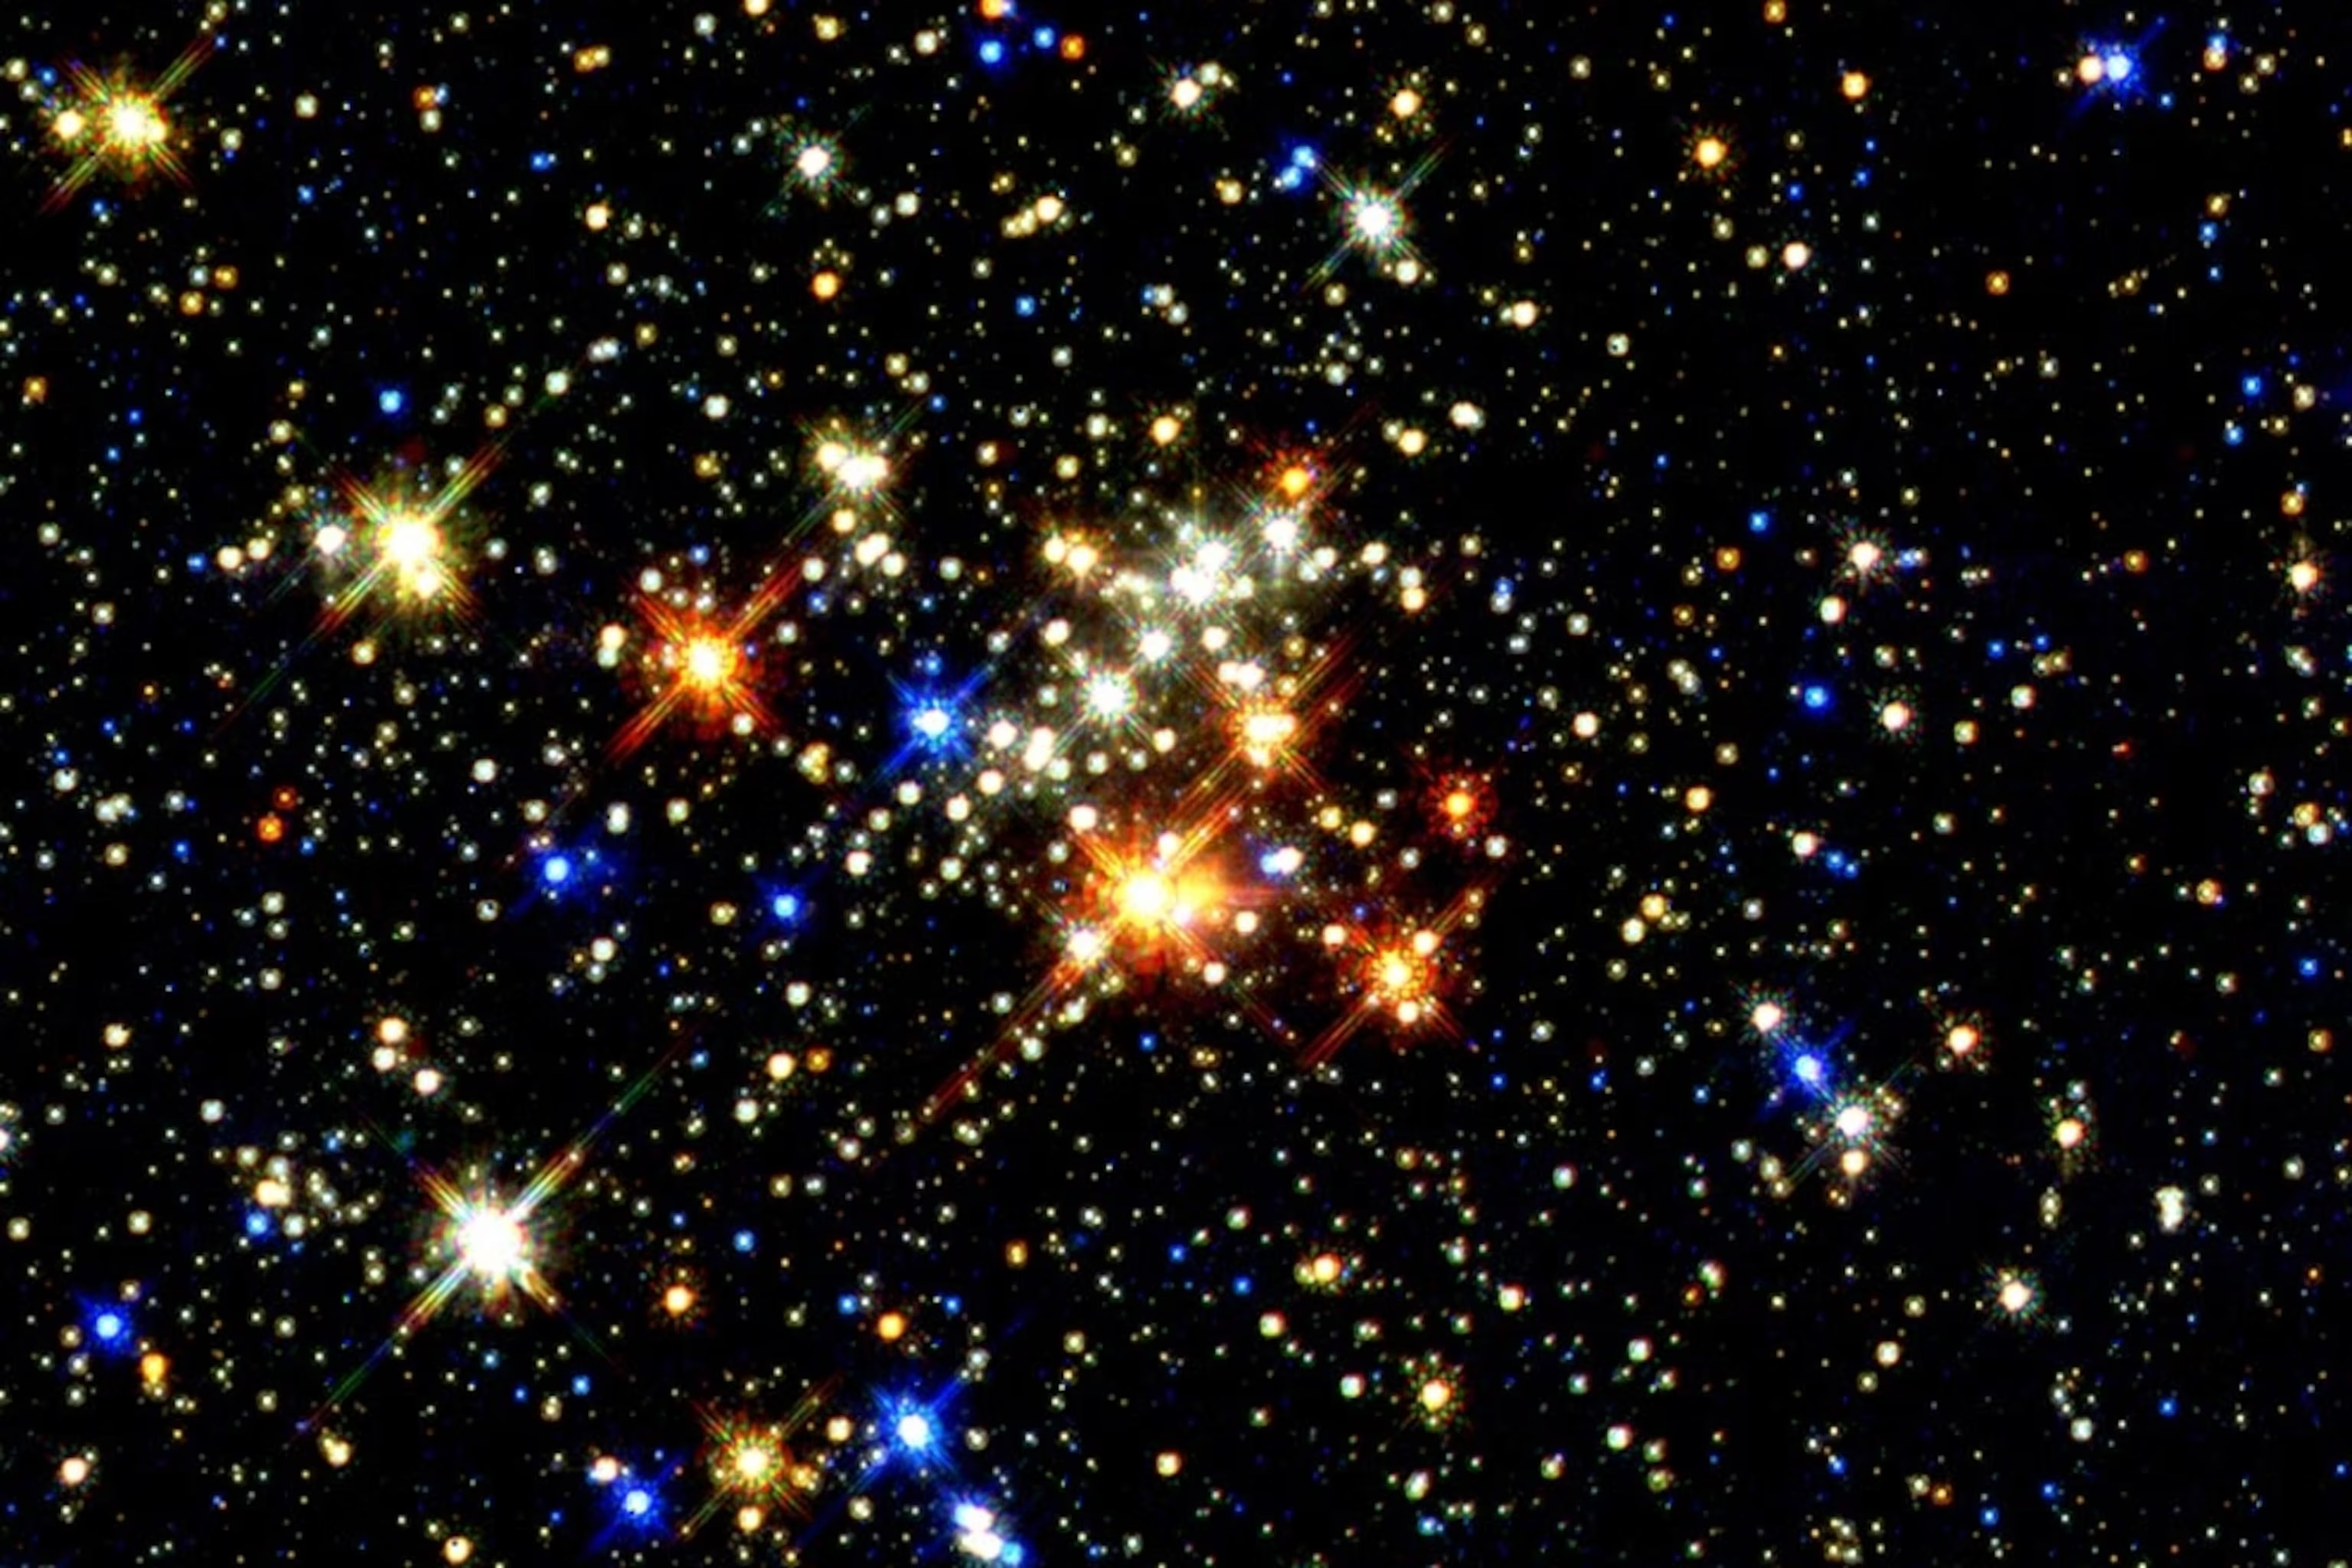
Nel file `stars.csv` sono contenuti i valori di alcune grandezze per un gran numero di stelle osservabili dalla Terra. Per ogni stella si ha:
* Temperature (K): temperatura
* Luminosity(L/Lo): luminosità relativa
* Radius(R/Ro): raggio relativo
* Absolute Magnitude (Mv): luminosità assoluta
* Star Color (white,Red,Blue,Yellow,yellow-orange etc): colore
* Spectral Class (O,B,A,F,G,K,M): classe spettrale
* Star Type: tipo di stella: 
    * 0: Red Dwarf
    * 1: Brown Dwarf
    * 2: White Dwarf
    * 3: Main Sequence
    * 4: SuperGiants
    * 5: HyperGiants

**RISOLVI OGNI PUNTO DOPO LA CELLA CHE CONTIENE LA RELATIVA CONSEGNA**

1) La variabile target è `Star Type`. Individua le tre feature più importanti per creare un classificatore di stelle, mediante un classificatore **RandomForest**.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [57]:
data = pd.read_csv("./stars.csv")
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [59]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [60]:
encoded = LabelEncoder()
data["Star color"] = LabelEncoder().fit_transform(data["Star color"])
data["Spectral Class"] = LabelEncoder().fit_transform(data["Spectral Class"])
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


In [61]:
features = ["Temperature (K)","Luminosity(L/Lo)","Radius(R/Ro)","Absolute magnitude(Mv)","Star color","Spectral Class"]
target = ["Star type"]

In [62]:
X = data[features]
y = data[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

In [64]:
model = RandomForestClassifier(max_depth = 15, random_state = 123)
model.fit(X_train, y_train)

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, random_state=123)

In [65]:
y_pred = model.predict(X_test)
accuratezza = accuracy_score(y_test, y_pred)
accuratezza

1.0

In [66]:
model.score(X_test, y_test)

1.0

In [67]:
for features, importance in zip(features, model.feature_importances_):
    print(f"{features}: {importance}")

Temperature (K): 0.08728814910460071
Luminosity(L/Lo): 0.14501994598809842
Radius(R/Ro): 0.3162932228930537
Absolute magnitude(Mv): 0.34778741058707874
Star color: 0.020039967866205387
Spectral Class: 0.08357130356096303


2) Utilizza le features che ritieni più importanti (secondo quanto risposto nella domanda precedente) per creare un modello MLP **con il minimo numero di neuroni** che classifichi correttamente le stelle (variabile target: `Star Type`). Stampa gli score di training e di test.

In [68]:
X = data[["Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]].values
y = data["Star type"].values

In [69]:
x_scaler = StandardScaler()
X_sc = x_scaler.fit_transform(X)

In [70]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, random_state=42)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [72]:
model.fit(X_train, y_train)

c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=300, random_state=42)

In [73]:
model.score(X_test, y_test)

0.7291666666666666

## 2 - I gelatai preferiscono l'estate o l'inverno?
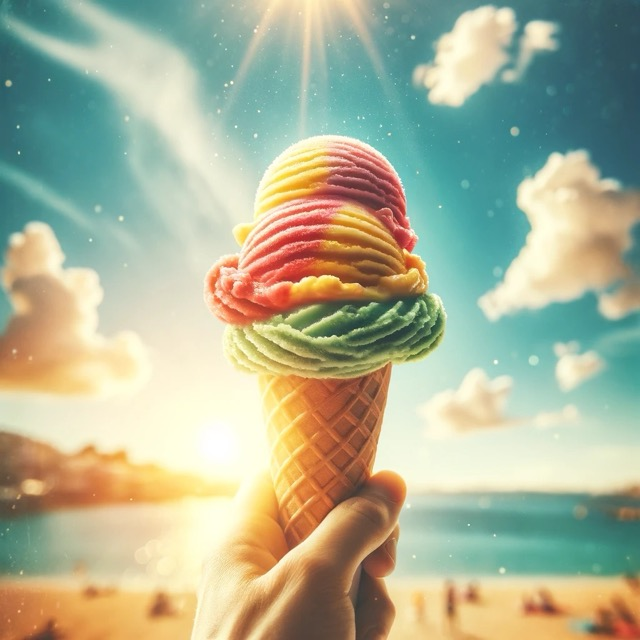

Nel file `gelati.json` sono contenuti i dati giornalieri di incasso per la vendita di gelati in euro (`Ice Cream Profits`) e la temperatura media di quel giorno in °C (`Temperature`).

**RISOLVI OGNI PUNTO DOPO LA CELLA CHE CONTIENE LA RELATIVA CONSEGNA**


1) Esegui una regressione lineare che consenta al gelataio di prevedere l'incasso giornaliero a partire dalla temperatura. Calcola il coefficiente $R^2$ per i dataset di training e di test, oltre esegui la `predict` chiedendo in input all'utente la tempertura e stampando l'incasso previsto.

In [74]:
data2 = pd.read_json("./gelati.json")
data2

,Temperature °C,Ice Cream Profits
0,3.888889,13.17
1,4.444444,11.88
2,5.000000,18.82
3,5.555556,18.65
4,6.111111,17.02
...,...,...
360,37.222222,85.13
361,37.222222,87.08
362,37.222222,89.29
363,38.333333,81.91


In [75]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature °C     365 non-null    float64
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [76]:
data2.describe()

,Temperature °C,Ice Cream Profits
count,365.000000,365.000000
mean,22.211568,52.103616
std,7.365839,15.989004
min,3.888889,11.880000
25%,17.222222,40.650000
50%,22.777778,53.620000
75%,27.777778,63.630000
max,38.333333,89.290000


In [77]:
target = ["Temperature °C"]
feature = ["Ice Cream Profits"]

In [78]:
x = data2[feature]
y = data2[target]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [80]:
model = LinearRegression(fit_intercept =  True)  
model.fit(x, y)

LinearRegression()

In [81]:
model.score(x, y)

0.9770249461723419

In [82]:
print("Inserisci la temperatura desiderata: ")
incassoPrevisto = model.predict(float(input()))
incassoPrevisto

Inserisci la temperatura desiderata: 


c:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=34.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

2) **[FACOLTATIVO DSA/ BONUS]** Traccia un grafico a dispersione dei campioni in cui riporti la retta di regressione.

In [84]:
coef_angolare = model.coef_[0]
intercetta = model.intercept_

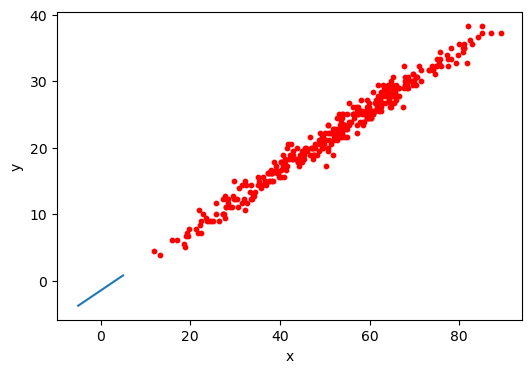

In [89]:
ascissa = np.linspace(-5, 5, 100)
ordinata = coef_angolare * ascissa  + intercetta
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(x, y, color = "r", s = 10)
ax.plot(ascissa, ordinata)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()